# Aula 004 - Data Viz - Seaborn
___

Seaborn é uma biblioteca construída com base no matplotlib. É poderosa para demonstrar rapidamente relações entre dados e visualizações estatísticas.

In [1]:
## importando as bibs
import matplotlib.pyplot as plt
import seaborn as sns

## importando o pandas
import pandas as pd

## importando o numpy
import numpy as np

## warnings
import warnings
warnings.filterwarnings('ignore')

## Gráfico de contagem
___

O método mais fácil de fazer a contagem da frequência de variáveis categóricas é utilizando o ```.countplot()```, ele automaticamente cria uma barra para cada possível valor da variável categórica e conta quantas vezes cada um desses valores aparece.

In [2]:
df = pd.read_csv('data/summer2016.csv')
df.head()

Unnamed: 0   ID                         Name Sex   Age  Height  Weight  \
0         158   62            Giovanni Abagnale   M  21.0   198.0    90.0   
1         161   65            Patimat Abakarova   F  21.0   165.0    49.0   
2         175   73                    Luc Abalo   M  31.0   182.0    86.0   
3         450  250         Saeid Morad Abdevali   M  26.0   170.0    80.0   
4         794  455  Denis Mikhaylovich Ablyazin   M  24.0   161.0    62.0   

         Team  NOC        Games  Year  Season            City       Sport  \
0       Italy  ITA  2016 Summer  2016  Summer  Rio de Janeiro      Rowing   
1  Azerbaijan  AZE  2016 Summer  2016  Summer  Rio de Janeiro   Taekwondo   
2      France  FRA  2016 Summer  2016  Summer  Rio de Janeiro    Handball   
3        Iran  IRI  2016 Summer  2016  Summer  Rio de Janeiro   Wrestling   
4      Russia  RUS  2016 Summer  2016  Summer  Rio de Janeiro  Gymnastics   

                                       Event   Medal  
0                 Rowing Men's Coxless Pairs  Bronze  
1                Taekwondo Women's Flyweight  Bronze  
2                    Handball Men's Handball  Silver  
3  Wrestling Men's Middleweight, Greco-Roman  Bronze  
4           Gymnastics Men's Team All-Around  Silver

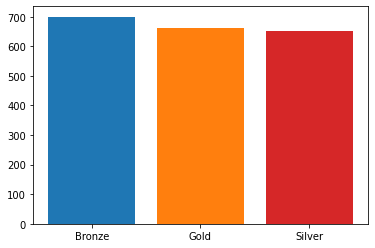

In [3]:
data_plot = df.Medal.value_counts()
ls_cores = ['tab:blue','tab:orange','tab:red']

f, ax = plt.subplots()

for idx in range(len(data_plot)):

    ax.bar(data_plot.index[idx],data_plot.values[idx],color=ls_cores[idx])

<AxesSubplot:xlabel='Medal', ylabel='count'>

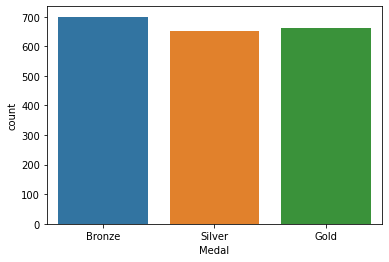

In [4]:
sns.countplot(df.Medal)

<AxesSubplot:xlabel='Sport', ylabel='count'>

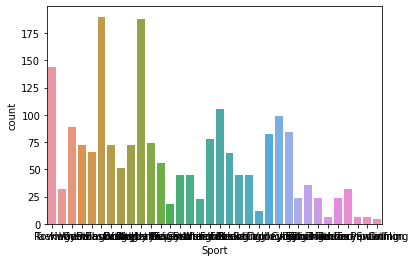

In [5]:
sns.countplot(df.Sport)

Podemos utilizar um axe do matplotlib para nosso gráfico no seaborn.

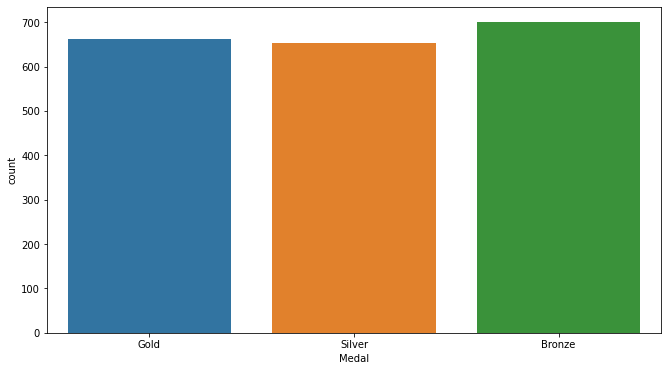

In [6]:
## trocando a ordem das medalhas
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(df.Medal,ax=ax,order=['Gold','Silver','Bronze'])
plt.show()

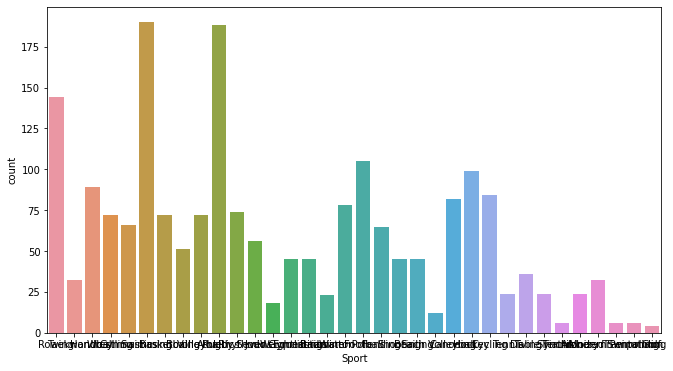

In [7]:
## quantos atletas eu tenho em cada esporte
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(df.Sport,ax=ax)

plt.show()

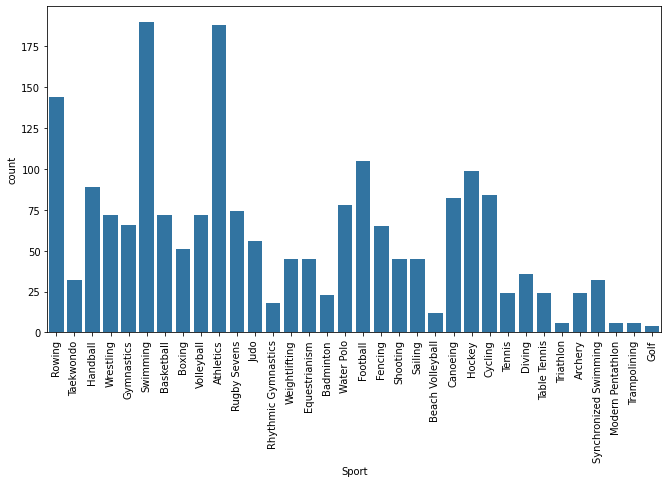

In [8]:
## quantos atletas eu tenho em cada esporte
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(df.Sport,color='tab:blue',ax=ax)

ax.set_xticklabels(df.Sport.unique(),rotation=90)

plt.show()

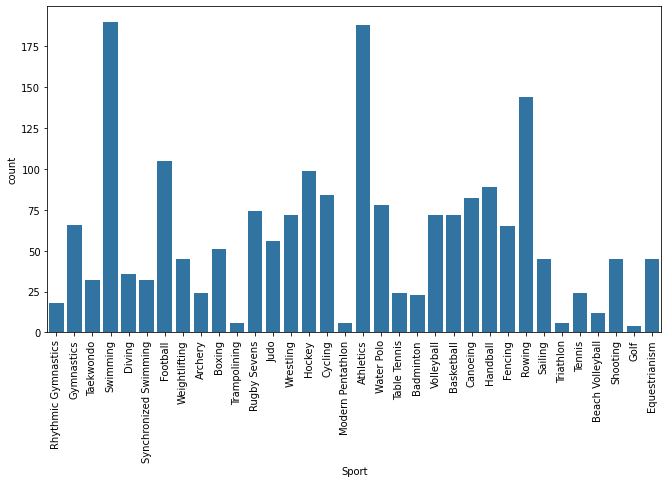

In [9]:
## quantos atletas eu tenho em cada esporte
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(df.Sport,color='tab:blue',ax=ax,order=df.groupby('Sport').mean().Age.sort_values().index)

ax.set_xticklabels(df.groupby('Sport').mean().Age.sort_values().index,rotation=90)
plt.show()

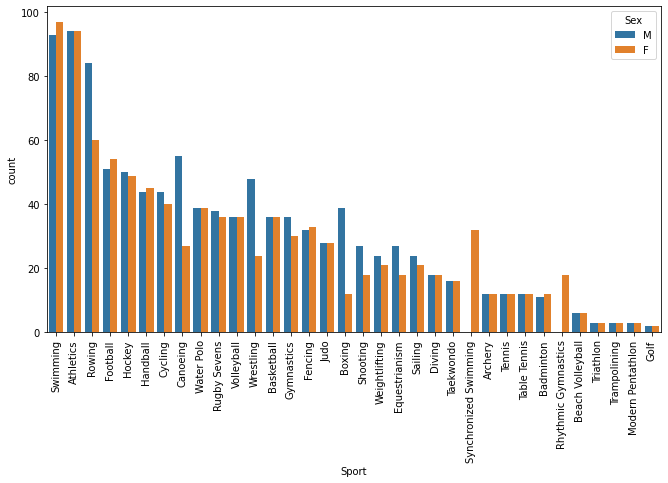

In [10]:
## quantos atletas homens e mulheres temos em cada esporte
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(x='Sport',
              data=df,
              hue='Sex',
              ax=ax,
              dodge=True,
              order=df.Sport.value_counts().index)

ax.set_xticklabels(df.Sport.value_counts().index,rotation=90)
plt.show()

## Gráfico de dispersão
___

In [11]:
df = pd.read_csv('data/countries-of-the-world.csv',decimal=',')
df.columns = [x.lower().replace('.','').replace(' ','_') for x in df.columns]

In [12]:
df.head()

country                               region  population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   area_(sq_mi)  pop_density_(per_sq_mi)  coastline_(coast/area_ratio)  \
0        647500                     48.0                          0.00   
1         28748                    124.6                          1.26   
2       2381740                     13.8                          0.04   
3           199                    290.4                         58.29   
4           468                    152.1                          0.00   

   net_migration  infant_mortality_(per_1000_births)  gdp_($_per_capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   literacy_(%)  phones_(per_1000)  arable_(%)  crops_(%)  other_(%)  climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   birthrate  deathrate  agriculture  industry  service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

In [13]:
regioes = df.region.value_counts().head(2).index

In [14]:
df = df[df.region.isin(regioes)]

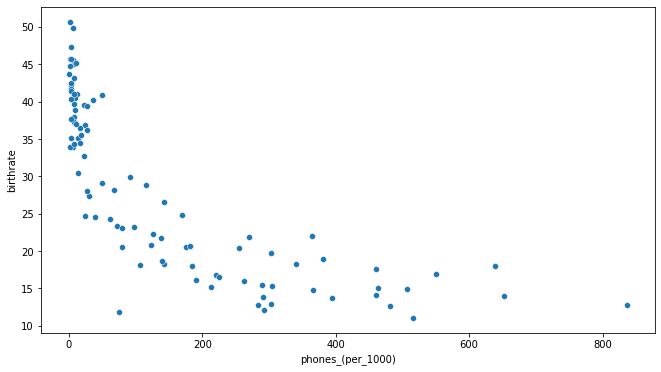

In [15]:
f, ax = plt.subplots(figsize=(11,6))

sns.scatterplot(x='phones_(per_1000)',
                y='birthrate',
                data=df,
                ax=ax)

plt.show()

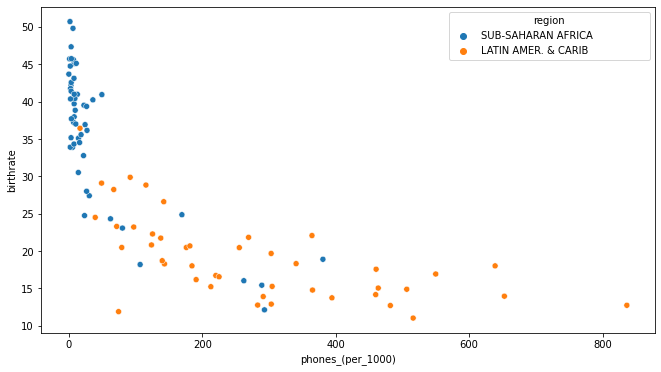

In [16]:
f, ax = plt.subplots(figsize=(11,6))

sns.scatterplot(x='phones_(per_1000)',
                y='birthrate',
                hue='region',
                data=df,
                ax=ax)

plt.show()

In [17]:
df.region.unique()

array(['SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    '],
      dtype=object)

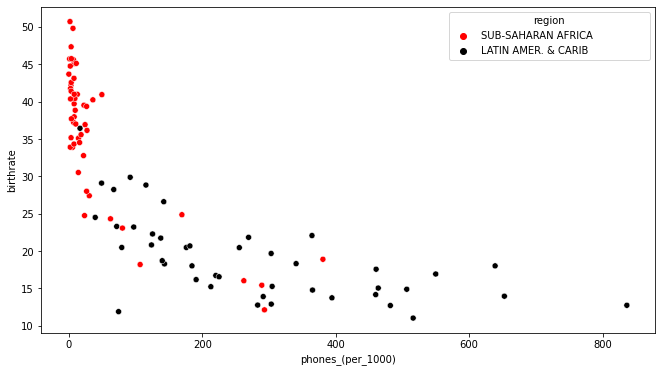

In [18]:
f, ax = plt.subplots(figsize=(11,6))

cores = {'SUB-SAHARAN AFRICA                 ':'red',
         'LATIN AMER. & CARIB    ':'black'}

sns.scatterplot(x='phones_(per_1000)',
                y='birthrate',
                hue='region',
                palette=cores,
                data=df,
                ax=ax)

plt.show()

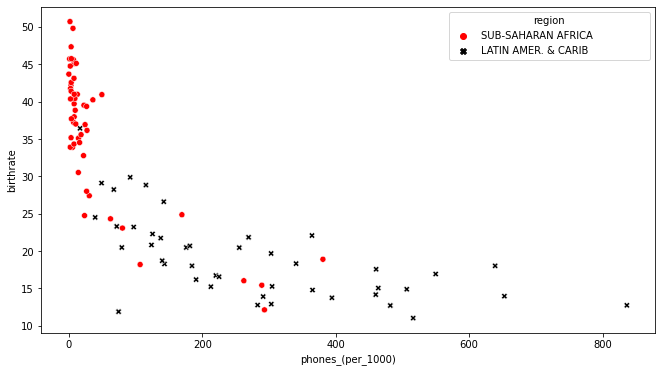

In [19]:
f, ax = plt.subplots(figsize=(11,6))

cores = {'SUB-SAHARAN AFRICA                 ':'red',
         'LATIN AMER. & CARIB    ':'black'}

sns.scatterplot(x='phones_(per_1000)',
                y='birthrate',
                hue='region',
                style='region',
                palette=cores,
                data=df,
                ax=ax)

plt.show()

<AxesSubplot:>

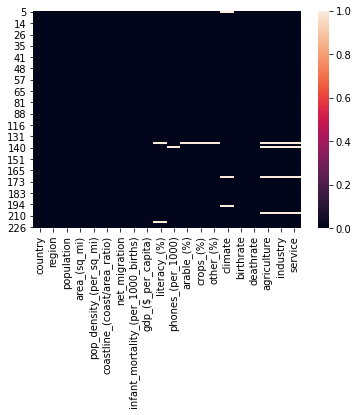

In [20]:
sns.heatmap(df.isna())

<AxesSubplot:>

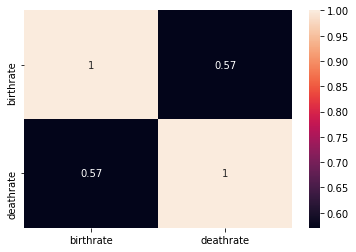

In [21]:
sns.heatmap(df[['birthrate','deathrate']].corr(),annot=True)

## Plots relacionais
___

Os plots relacionais são usados para criar análises entre duas variáveis e que podem resultar em múltiplots plots menores.

In [22]:
df = pd.read_csv('data/mpg.csv')

In [23]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

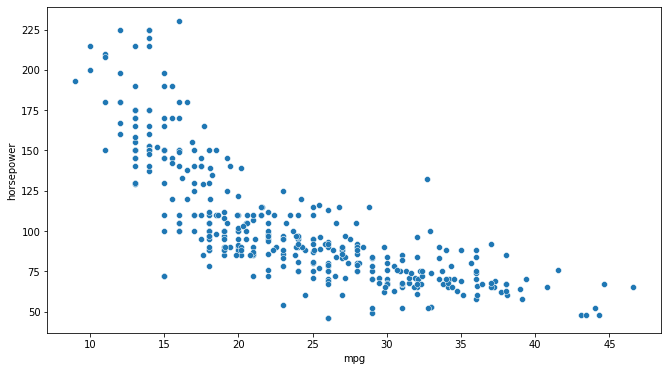

In [24]:
f, ax = plt.subplots(figsize=(11,6))

sns.scatterplot(x='mpg',
                y='horsepower',
                data=df,
                ax=ax)

plt.show()

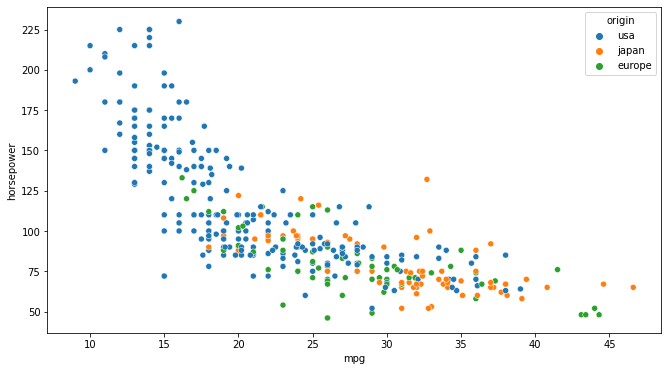

In [25]:
f, ax = plt.subplots(figsize=(11,6))

sns.scatterplot(x='mpg',
                y='horsepower',
                hue='origin',
                data=df,
                ax=ax)

plt.show()

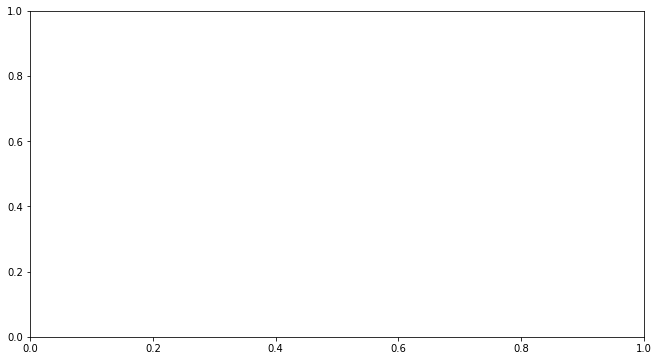

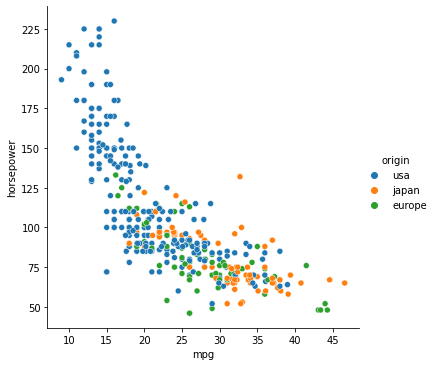

In [26]:
f, ax = plt.subplots(figsize=(11,6))

sns.relplot(x='mpg',
            y='horsepower',
            hue='origin',
            kind='scatter',
            data=df,
            ax=ax)

plt.show()

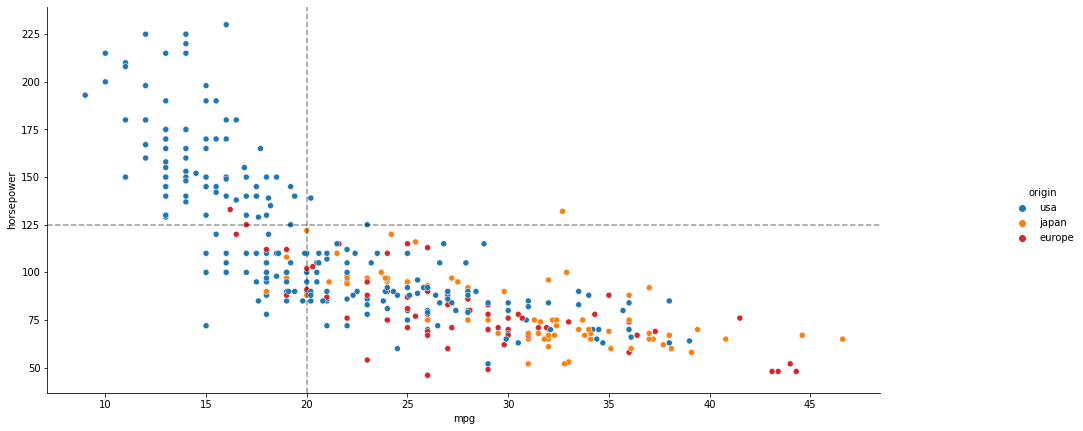

In [49]:
g = sns.relplot(x='mpg',
            y='horsepower',
            hue='origin',
            kind='scatter',
            data=df,
            ax=ax,
            palette=['tab:blue','tab:orange','tab:red'])

plt.axhline(125,color='black',ls='--',alpha=0.4)
plt.axvline(20,color='black',ls='--',alpha=0.4)

g.fig.set_size_inches(16,6)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [58]:
data = (
    df[['mpg','horsepower','origin']]
    .dropna()
)

In [60]:
data.head()

mpg  horsepower origin
0  18.0       130.0    usa
1  15.0       165.0    usa
2  18.0       150.0    usa
3  16.0       150.0    usa
4  17.0       140.0    usa

In [65]:
x,y = data.drop('origin',axis=1),data.origin

In [66]:
y

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 392, dtype: object

In [68]:
lb = LabelEncoder().fit(y)
y = lb.transform(y)

In [70]:
lb.classes_

array(['europe', 'japan', 'usa'], dtype=object)

In [96]:
dt = DecisionTreeClassifier(max_depth=4).fit(x,y)

In [97]:
dt.classes_

array([0, 1, 2])

In [98]:
obs = x[(x.mpg > 20)&(x.horsepower < 125)].values

In [99]:
ls_previsoes = []

for carro in obs:
    ls_previsoes.append(dt.predict_proba([carro]).squeeze().tolist())
else:
    ls_previsoes = np.array(ls_previsoes)

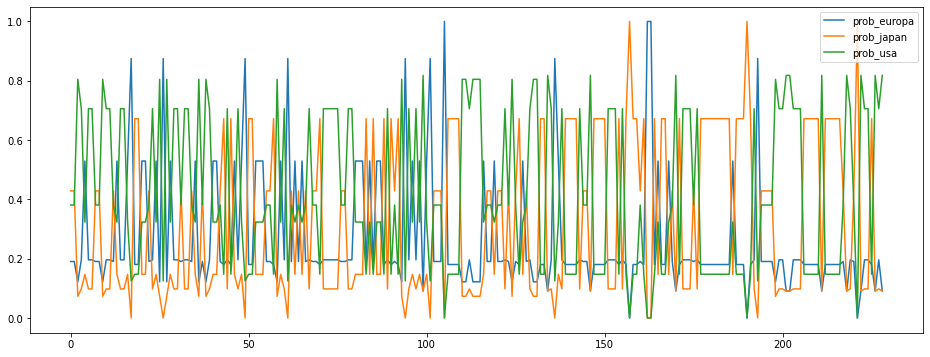

In [101]:
f, ax = plt.subplots(1,1,figsize=(16,6))

ax.plot(ls_previsoes[:,0],label='prob_europa')
ax.plot(ls_previsoes[:,1],label='prob_japan')
ax.plot(ls_previsoes[:,2],label='prob_usa')

plt.legend()
plt.show()

In [86]:
dt.predict_proba([[ 18., 130.]]).squeeze().tolist()

[0.0, 0.0, 1.0]

In [47]:
(
    df
    .query("mpg < 20")
    .query("horsepower > 125")
    .origin
    .value_counts(normalize=True)
)

usa       0.989583
europe    0.010417
Name: origin, dtype: float64

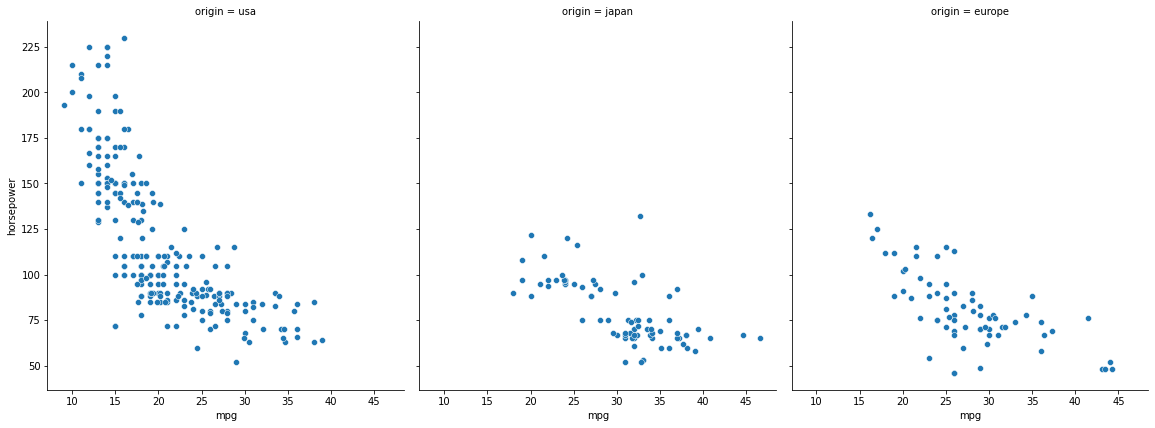

In [30]:
g = sns.relplot(x='mpg',
            y='horsepower',
            col='origin',
            kind='scatter',
            data=df,
            ax=ax)

g.fig.set_size_inches(16,6)

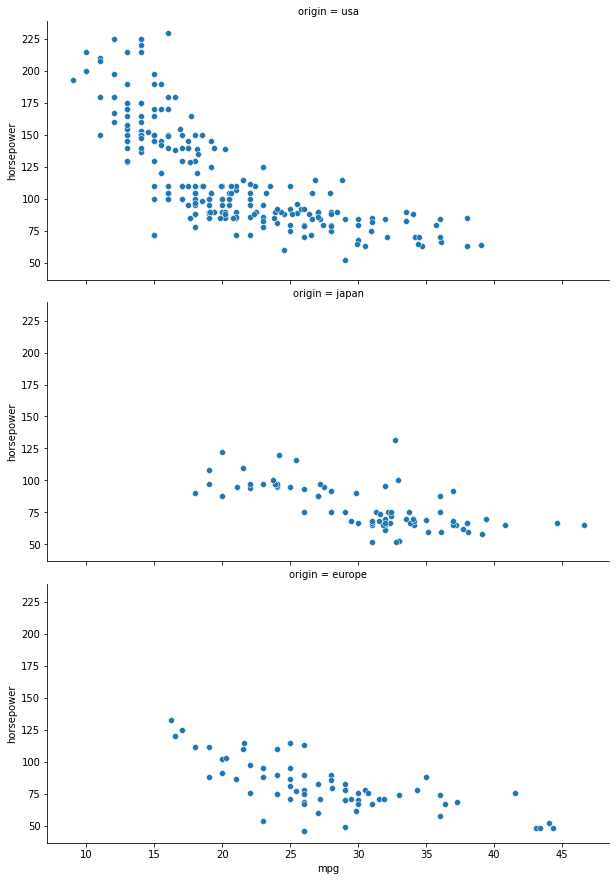

In [31]:
g = sns.relplot(x='mpg',
            y='horsepower',
            row='origin',
            kind='scatter',
            data=df,
            ax=ax)

g.fig.set_size_inches(9,12)

In [32]:
df.model_year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [33]:
def velho_novo(value):
    if value < 76:
        return 'velho'
    else:
        return 'novo'
    
df['modelo'] = df.model_year.apply(velho_novo)

In [34]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name modelo  
0          70    usa  chevrolet chevelle malibu  velho  
1          70    usa          buick skylark 320  velho  
2          70    usa         plymouth satellite  velho  
3          70    usa              amc rebel sst  velho  
4          70    usa                ford torino  velho

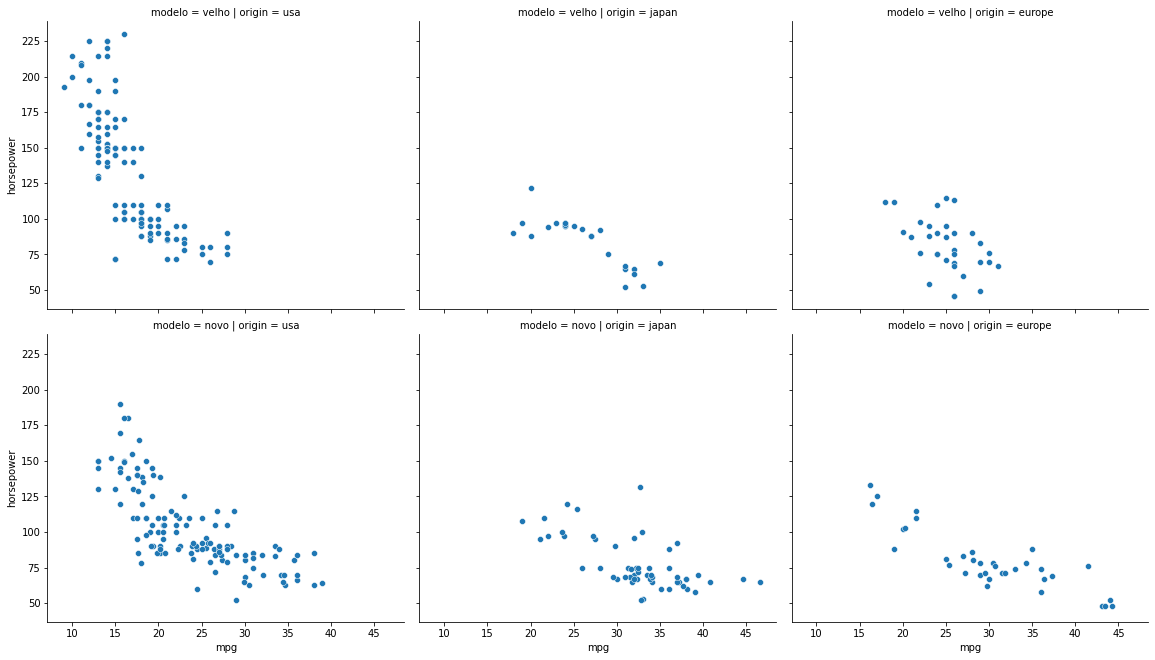

In [35]:
g = sns.relplot(x='mpg',
            y='horsepower',
            col='origin',
            row='modelo',
            kind='scatter',
            data=df,
            ax=ax)

g.fig.set_size_inches(16,9)

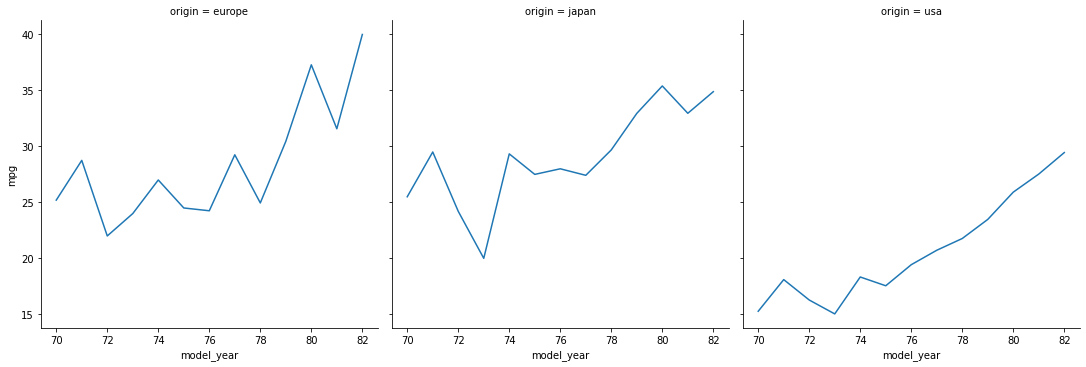

In [102]:
data = df[['model_year','mpg','origin']].groupby(['model_year','origin'],as_index=False).mean()

g = sns.relplot(x='model_year',y='mpg',col='origin',data=data,kind='line',markers=True)

In [103]:
df = pd.read_csv('data/simplemaps_uszips_basicv1.78/uszips.csv')

In [112]:
store_id = pd.read_csv('trabalhos/trabalho001/data/store_data.csv',sep='\t',names=['store_id','city','state','zipcode'])

In [115]:
df.head()

zip       lat       lng       city state_id   state_name  zcta  \
0  601  18.18005 -66.75218   Adjuntas       PR  Puerto Rico  True   
1  602  18.36074 -67.17519     Aguada       PR  Puerto Rico  True   
2  603  18.45440 -67.12201  Aguadilla       PR  Puerto Rico  True   
3  606  18.16721 -66.93828    Maricao       PR  Puerto Rico  True   
4  610  18.29032 -67.12244     Anasco       PR  Puerto Rico  True   

   parent_zcta  population  density  county_fips county_name  \
0          NaN     17113.0    102.7        72001    Adjuntas   
1          NaN     37751.0    476.0        72003      Aguada   
2          NaN     47081.0    574.9        72005   Aguadilla   
3          NaN      6392.0     58.3        72093     Maricao   
4          NaN     26686.0    286.9        72011      Añasco   

                                      county_weights  \
0                {"72001": "99.43", "72141": "0.57"}   
1                                   {"72003": "100"}   
2                                   {"72005": "100"}   
3  {"72093": "94.88", "72153": "3.78", "72121": "...   
4                {"72011": "99.45", "72003": "0.55"}   

              county_names_all    county_fips_all  imprecise  military  \
0              Adjuntas|Utuado        72001|72141      False     False   
1                       Aguada              72003      False     False   
2                    Aguadilla              72005      False     False   
3  Maricao|Yauco|Sabana Grande  72093|72153|72121      False     False   
4                Añasco|Aguada        72011|72003      False     False   

              timezone  
0  America/Puerto_Rico  
1  America/Puerto_Rico  
2  America/Puerto_Rico  
3  America/Puerto_Rico  
4  America/Puerto_Rico

In [117]:
a = store_id.merge(df,left_on='zipcode',right_on='zip',how='inner')

In [118]:
import folium as fl

In [159]:
a.store_id.nunique()

4356

In [155]:
m = fl.Map(location=[37.0902, -95.7129],zoom_start=4)

In [160]:
for loc in a[['lat','lng']].values:
    fl.Circle(location=[loc[0],loc[1]],radius=1500).add_to(m)

In [161]:
m

In [136]:
a[['lat','long']]

KeyError: "['long'] not in index"

In [ ]:
37.0902° N, 95.7129° W

In [122]:
m

In [105]:
df.head()

zip       lat       lng       city state_id   state_name  zcta  \
0  601  18.18005 -66.75218   Adjuntas       PR  Puerto Rico  True   
1  602  18.36074 -67.17519     Aguada       PR  Puerto Rico  True   
2  603  18.45440 -67.12201  Aguadilla       PR  Puerto Rico  True   
3  606  18.16721 -66.93828    Maricao       PR  Puerto Rico  True   
4  610  18.29032 -67.12244     Anasco       PR  Puerto Rico  True   

   parent_zcta  population  density  county_fips county_name  \
0          NaN     17113.0    102.7        72001    Adjuntas   
1          NaN     37751.0    476.0        72003      Aguada   
2          NaN     47081.0    574.9        72005   Aguadilla   
3          NaN      6392.0     58.3        72093     Maricao   
4          NaN     26686.0    286.9        72011      Añasco   

                                      county_weights  \
0                {"72001": "99.43", "72141": "0.57"}   
1                                   {"72003": "100"}   
2                                   {"72005": "100"}   
3  {"72093": "94.88", "72153": "3.78", "72121": "...   
4                {"72011": "99.45", "72003": "0.55"}   

              county_names_all    county_fips_all  imprecise  military  \
0              Adjuntas|Utuado        72001|72141      False     False   
1                       Aguada              72003      False     False   
2                    Aguadilla              72005      False     False   
3  Maricao|Yauco|Sabana Grande  72093|72153|72121      False     False   
4                Añasco|Aguada        72011|72003      False     False   

              timezone  
0  America/Puerto_Rico  
1  America/Puerto_Rico  
2  America/Puerto_Rico  
3  America/Puerto_Rico  
4  America/Puerto_Rico